# 0.导包、导数据

In [39]:
import xgboost as xgb
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csc_matrix

from sklearn.ensemble import RandomForestClassifier  
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [104]:
# 取17-23作为测试，24作为验证
data = pd.read_pickle('data/round1_train2')
feature_train = data[data['f16'] <= 1537718400]
feature_train.drop('label',axis = 1,inplace = True)
feature_val = data[data['f16'] > 1537718400]
feature_val.drop('label',axis = 1,inplace = True)

label_train = data[data['f16'] <= 1537718400]['label']
label_val = data[data['f16'] > 1537718400]['label']

data = pd.read_pickle('data/round1_test2')
feature_test = data

data_index = pd.DataFrame(np.genfromtxt('data/round1_test.txt',dtype = np.str, delimiter=' ',skip_header=1))[0]

In [106]:
feature_val.drop([ 'f1-ratio-5', 'f4-ratio-5', 'f5-ratio-5', 'f10-ratio-5',
       'f1-f4-ratio-5', 'f1-f5-ratio-5', 'f4-f5-ratio-5', 'f4-f19-ratio-5',
       'f5-f19-ratio-5', 'f1-count-5', 'f4-count-5', 'f5-count-5',
       'f10-count-5', 'f19-count-5', 'f1-f4-count-5', 'f1-f5-count-5',
       'f4-f5-count-5', 'f4-f19-count-5', 'f5-f19-count-5',
       'f1-browse-count-5', 'f4-browse-count-5', 'f5-browse-count-5',
       'f10-browse-count-5', 'f19-browse-count-5', 'f1-f4-browse-count-5',
       'f1-f5-browse-count-5', 'f1-f19-browse-count-5', 'f4-f5-browse-count-5',
       'f4-f19-browse-count-5', 'f5-f10-browse-count-5',
       'f5-f19-browse-count-5'],axis = True,inplace = True)
# feature_train.drop(['f5-f19-browse-count-5'],axis = True,inplace = True)

In [80]:
feature_train.columns

Index(['f0', 'f1', 'f2:2_22731265849056483', 'f2:2_509660095530134768',
       'f2:2_1968056100269760729', 'f2:2_2011981573061447208',
       'f2:2_2436715285093487584', 'f2:2_2642175453151805566',
       'f2:2_3203673979138763595', 'f2:2_4879721024980945592',
       'f2:2_5755694407684602296', 'f2:2_5799347067982556520',
       'f2:2_7258015885215914736', 'f2:2_8277336076276184272',
       'f2:2_8710739180200009128', 'f2:3_-1', 'f2:3_6233669177166538628',
       'f2:3_8868887661186419229', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11:woman', 'f11:man', 'f11:family', 'f11:other', 'f12', 'f13:2002.0',
       'f13:2003.0', 'f13:2004.0', 'f13:2005.0', 'f14', 'f15', 'f16',
       'f16:day', 'f16:hour', 'f16:minute', 'f16:second', 'f16:dayofweek',
       'f16:dayofyear', 'f17', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25',
       'f1-ratio-5', 'f4-ratio-5', 'f5-ratio-5', 'f10-ratio-5', 'f19-ratio-5',
       'f1-f4-ratio-5', 'f1-f5-ratio-5', 'f4-f5-ratio-5', 'f4-f19-ratio-5',
  

In [135]:
# 取18-23作为测试，24作为验证
data = pd.read_pickle('data/round1_train2')
feature_train = data[(data['f16'] <= 1537718400) & (data['f16'] > 1537200000)]
feature_train.drop('label',axis = 1,inplace = True)
feature_val = data[data['f16'] > 1537718400]
feature_val.drop('label',axis = 1,inplace = True)

label_train = data[(data['f16'] <= 1537718400) & (data['f16'] > 1537200000)]['label']
label_val = data[data['f16'] > 1537718400]['label']

data = pd.read_pickle('data/round1_test2')
feature_test = data

data_index = pd.DataFrame(np.genfromtxt('data/round1_test.txt',dtype = np.str, delimiter=' ',skip_header=1))[0]

In [39]:
# 取17-22作为测试，23作为验证
data = pd.read_pickle('data/round1_train2')
feature_train = data[data['f16'] <= 1537632000]
feature_train.drop('label',axis = 1,inplace = True)
feature_val = data[(data['f16'] > 1537632000) & (data['f16'] <= 1537718400)]
feature_val.drop('label',axis = 1,inplace = True)

label_train = data[data['f16'] <= 1537632000]['label']
label_val = data[(data['f16'] > 1537632000) & (data['f16'] <= 1537718400)]['label']

data = pd.read_pickle('data/round1_test2')
feature_test = data

data_index = pd.DataFrame(np.genfromtxt('data/round1_test.txt',dtype = np.str, delimiter=' ',skip_header=1))[0]

In [143]:
# 取18-22作为测试，23作为验证
data = pd.read_pickle('data/round1_train2')
feature_train = data[(data['f16'] <= 1537632000) & (data['f16'] > 1537200000)]
feature_train.drop('label',axis = 1,inplace = True)
feature_val = data[(data['f16'] > 1537632000) & (data['f16'] <= 1537718400)]
feature_val.drop('label',axis = 1,inplace = True)

label_train = data[(data['f16'] <= 1537632000) & (data['f16'] > 1537200000)]['label']
label_val = data[(data['f16'] > 1537632000) & (data['f16'] <= 1537718400)]['label']

data = pd.read_pickle('data/round1_test2')
feature_test = data

data_index = pd.DataFrame(np.genfromtxt('data/round1_test.txt',dtype = np.str, delimiter=' ',skip_header=1))[0]

## 1.训练xgboost
这里要重点讲一下 Xgboost 的调参。通常认为对它性能影响较大的参数有：

- eta：每次迭代完成后更新权重时的步长。越小训练越慢。
- num_round：总共迭代的次数。
- subsample：训练每棵树时用来训练的数据占全部的比例。用于防止 Overfitting。
- colsample_bytree：训练每棵树时用来训练的特征的比例，类似 RandomForestClassifier 的 max_features。
- max_depth：每棵树的最大深度限制。与 Random Forest 不同，Gradient Boosting 如果不对深度加以限制，最终是会 Overfit 的。
- early_stopping_rounds：用于控制在 Out Of Sample 的验证集上连续多少个迭代的分数都没有提高后就提前终止训练。用于防止 Overfitting。

一般的调参步骤是：

- 将训练数据的一部分划出来作为验证集。
- 先将 eta 设得比较高（比如 0.1），num_round 设为 300 ~ 500。
- 用 Grid Search 对其他参数进行搜索
- 逐步将 eta 降低，找到最佳值。
- 以验证集为 watchlist，用找到的最佳参数组合重新在训练集上训练。注意观察算法的输出，看每次迭代后在验证集上分数的变化情况，从而得到最佳的 early_stopping_rounds。

In [107]:
train = xgb.DMatrix(feature_train,label = label_train)
val = xgb.DMatrix(feature_val,label = label_val)
test = xgb.DMatrix(feature_test)

In [108]:
# coding=utf-8


param = {
    # 1.General Parameters
    'booster': 'gbtree', # 提升计算的模型，可以是：gbtree, gblinear or dart
    'silent': 0,  # 0为打印信息，1为缄默
    # 'nthread': 4, # XGBoost运行时的线程数
    # 'num_pbuffer': # 预测缓冲区的大小，通常设置为训练实例的数量。缓冲区用于保存最后一次提升步骤的预测结果。
    # 'num_feature': # 特征值数量
    
    # 2.Booster Parameters
    'eta': 0.05,  # 学习率，默认0.3，取值范围为：[0,1]，典型值为0.01-0.2，越小越保守
    'gamma': 0.1,  # 节点分裂所需的最小损失函数下降值，和损失函数息息相关。默认0，典型值0.1、0.2，越大越保守，
    'max_depth': 5,  # 树的最大深度，默认6，典型值为3-10，越大越易过拟合。
    'min_child_weight':1, # 这个参数非常影响结果，最小叶子节点样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数。默认1，越大算法越易欠拟合
    'max_delta_step ':0, # 限制每棵树权重改变的最大步长。越大越保守。通常，这个参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。
    'subsample':0.8, # 用于训练模型的子样本占整个样本集合的比例，行采样，典型值0.5-1，越小越保守。
    'colsample_bytree ': 0.8,  # 在建立树时对特征采样的比例，列采样。典型值0.5-1

    'lambda':10, # 权重的L2正则化项，默认是1
    'alpha':1,# 权重的L1正则化项，默认是1
    'lambda_bias': 0,  # 在偏置上的L2正则。缺省值为0（在L1上没有偏置项的正则，因为L1时偏置不重要）
    # 'scale_pos_weight':0.5, # 各类样本十分不平衡时，把这个参数设置为一个正数，可以使算法更快收敛。默认是1

    # 3.Task Parameters
    # 'tree_method': 'approx',
    'objective': 'binary:logistic',  # 使用的模型，分类的数目
    'eval_metric':'logloss', # 校验数据所需要的评价指标，不同的目标函数将会有缺省的评价指标
    'base_score':0.5, # 对于所有样本预测为正样本的全局偏置（初始分数）。如果迭代次数够多，改变这个参数对结果不会有影响。
    'seed':0 # 随机数的种子
}
num_boost_round = 1000  # 迭代的次数，弱分类器的数量

watchlist = [(train, 'train'),(val, 'val')]  # 看板，每次迭代都可以在控制台打印出训练集与测试集的损失

In [109]:
# obj、feval、early_stopping_rounds、evals_result、verbose_eval、xgb_model

bst = xgb.train(param, train, num_boost_round, evals=watchlist, obj=None, feval=None, maximize=False,
      early_stopping_rounds=50, evals_result=None, verbose_eval=True, xgb_model=None, callbacks=None,learning_rates=None)
bst.save_model('data/model_xgboost')

[0]	train-logloss:0.648047	val-logloss:0.647781
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.60725	val-logloss:0.606735
[2]	train-logloss:0.570174	val-logloss:0.569424
[3]	train-logloss:0.53635	val-logloss:0.53539
[4]	train-logloss:0.505397	val-logloss:0.504226
[5]	train-logloss:0.476994	val-logloss:0.475621
[6]	train-logloss:0.450844	val-logloss:0.449303
[7]	train-logloss:0.426732	val-logloss:0.425014
[8]	train-logloss:0.404447	val-logloss:0.40255
[9]	train-logloss:0.383828	val-logloss:0.381779
[10]	train-logloss:0.364713	val-logloss:0.362504
[11]	train-logloss:0.346949	val-logloss:0.344577
[12]	train-logloss:0.330439	val-logloss:0.32791
[13]	train-logloss:0.315071	val-logloss:0.312397
[14]	train-logloss:0.300746	val-logloss:0.297935
[15]	train-logloss:0.287383	val-logloss:0.284434
[16]	train-logloss:0.274917	val-logloss:0.271839
[17]	train-logloss:0.263272	val-log

[164]	train-logloss:0.088163	val-logloss:0.081914
[165]	train-logloss:0.088142	val-logloss:0.081912
[166]	train-logloss:0.088128	val-logloss:0.08191
[167]	train-logloss:0.08811	val-logloss:0.081912
[168]	train-logloss:0.088089	val-logloss:0.081915
[169]	train-logloss:0.088069	val-logloss:0.081907
[170]	train-logloss:0.088047	val-logloss:0.081903
[171]	train-logloss:0.088024	val-logloss:0.081908
[172]	train-logloss:0.087999	val-logloss:0.081905
[173]	train-logloss:0.087975	val-logloss:0.081905
[174]	train-logloss:0.087957	val-logloss:0.08191
[175]	train-logloss:0.087939	val-logloss:0.081907
[176]	train-logloss:0.087921	val-logloss:0.081906
[177]	train-logloss:0.0879	val-logloss:0.081907
[178]	train-logloss:0.087878	val-logloss:0.08191
[179]	train-logloss:0.087866	val-logloss:0.081908
[180]	train-logloss:0.087855	val-logloss:0.081908
[181]	train-logloss:0.087839	val-logloss:0.081907
[182]	train-logloss:0.087812	val-logloss:0.08191
[183]	train-logloss:0.087798	val-logloss:0.081919
[184]	t

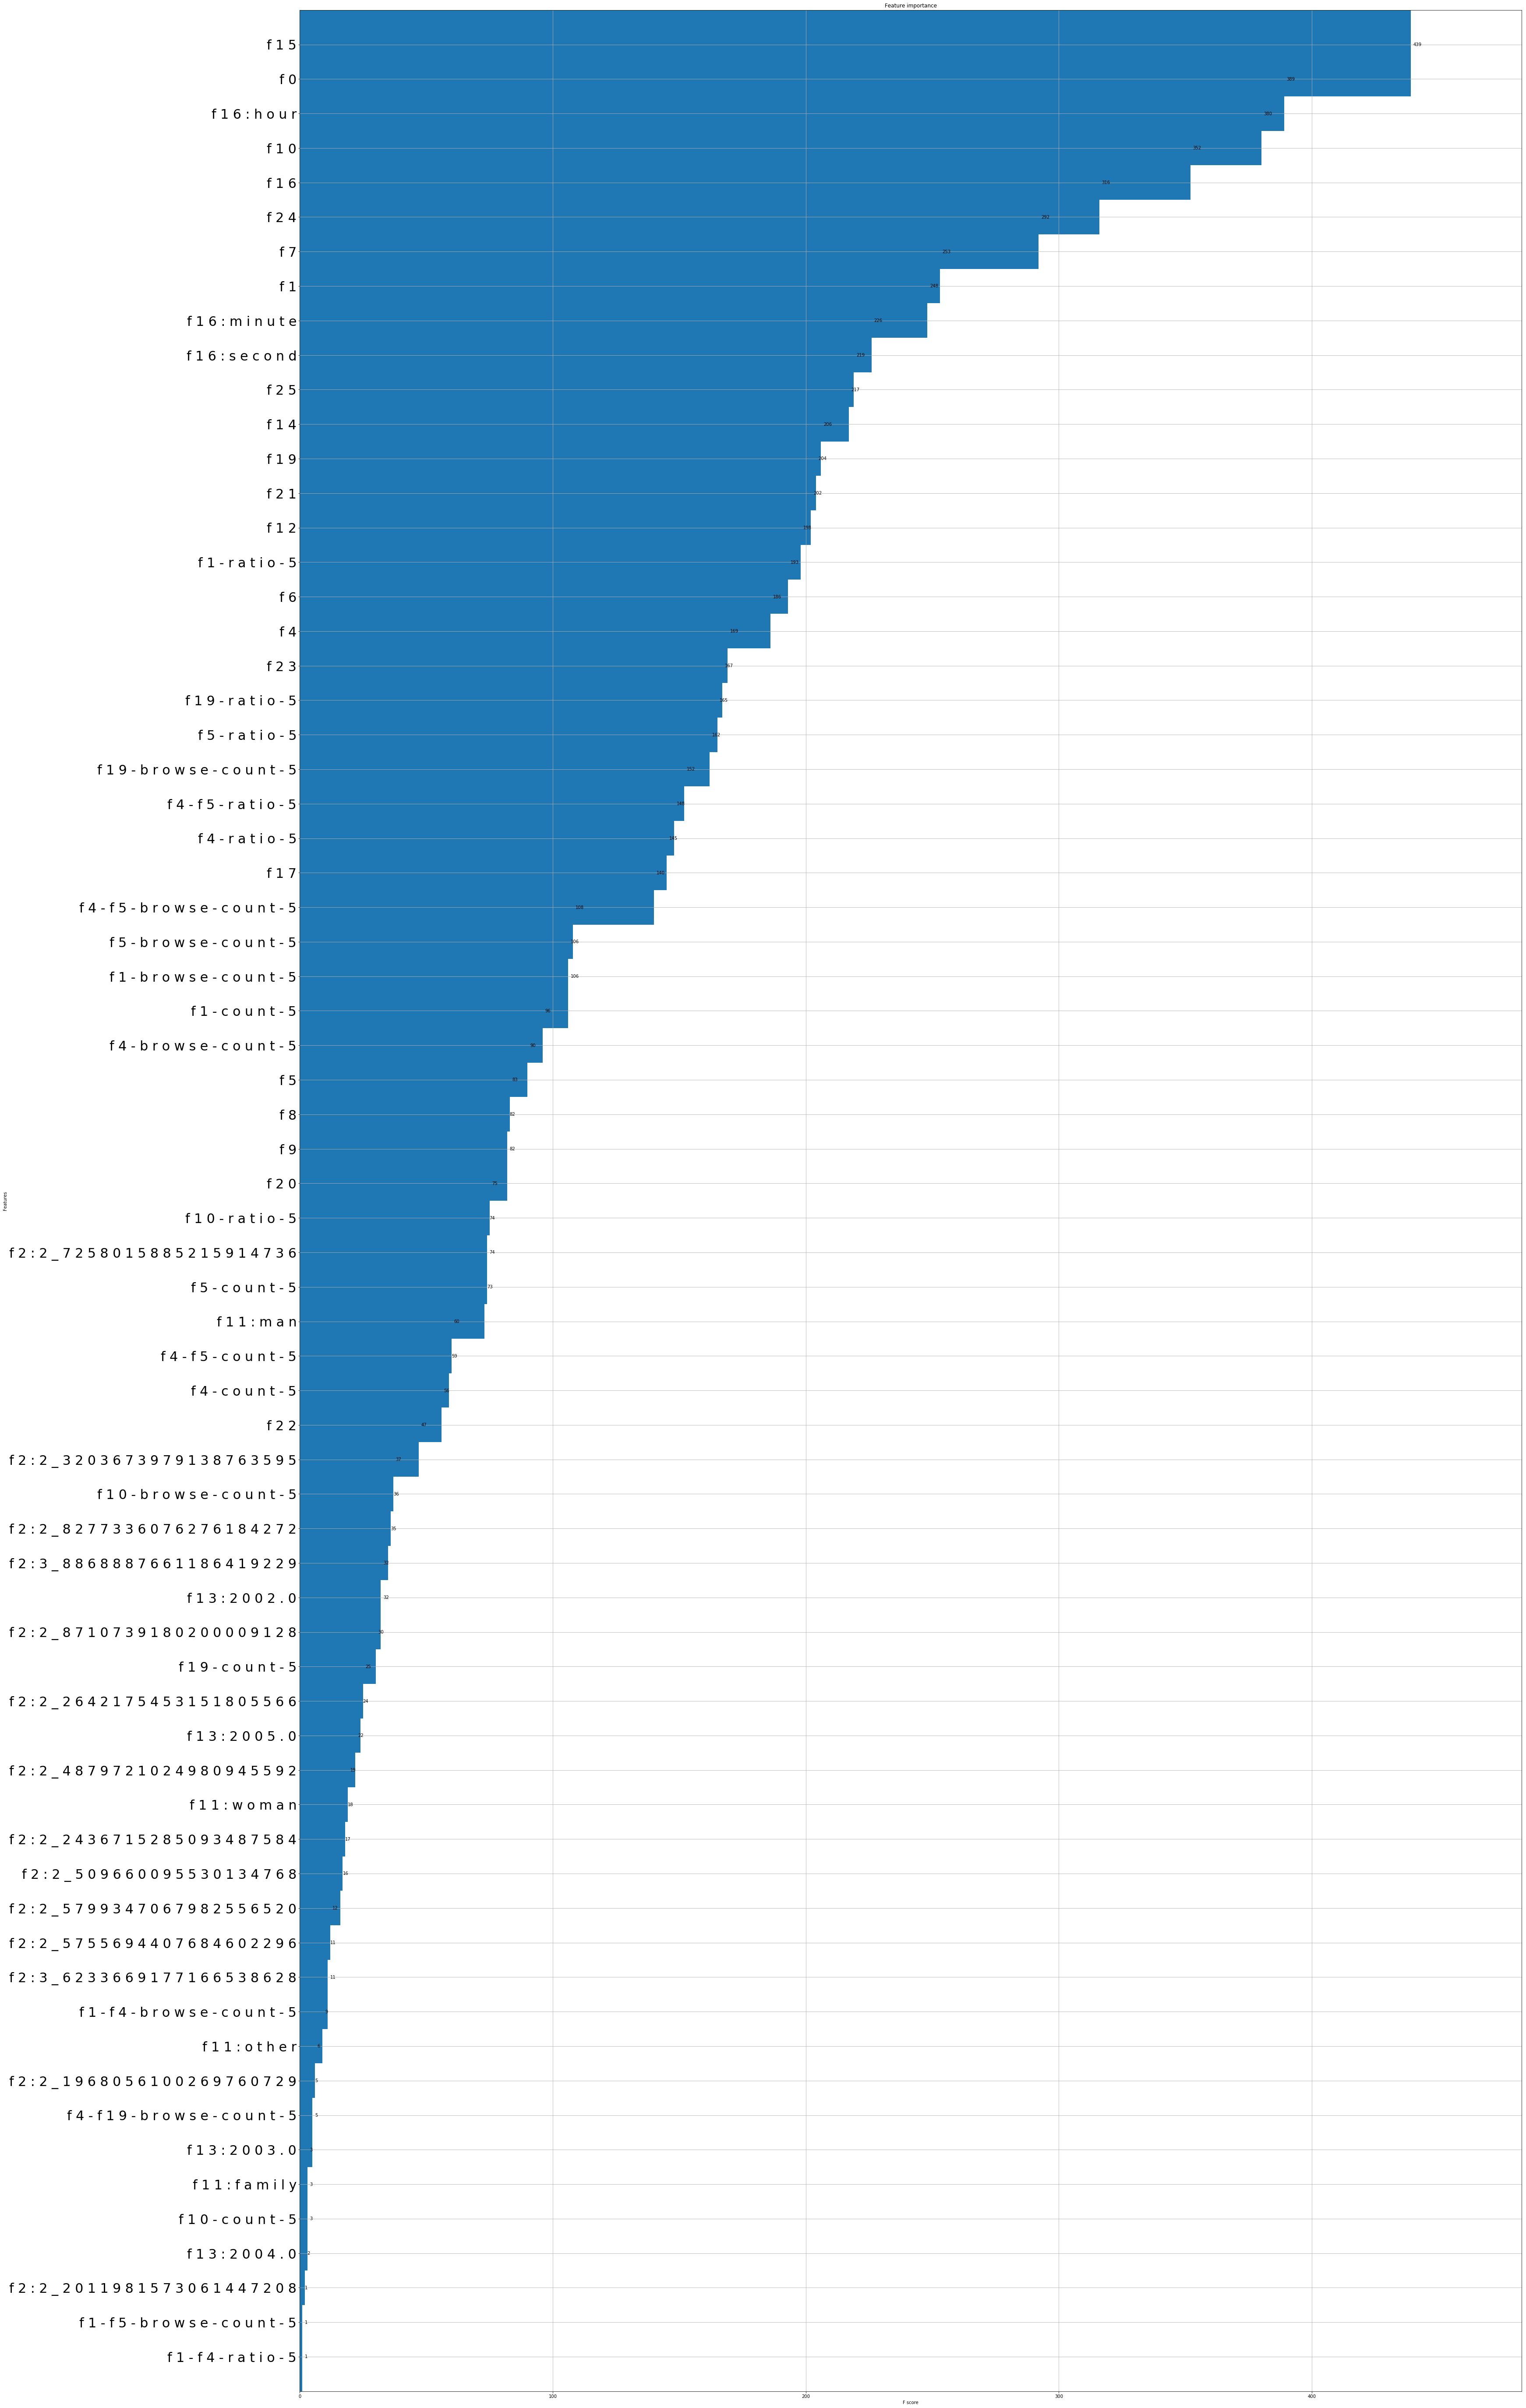

In [7]:
ax = plt.subplot(111)
plt.yticks(fontsize=30)
ax = xgb.plot_importance(bst,ax,height  = 3)
fig = ax.figure
fig.set_size_inches(50, 100)

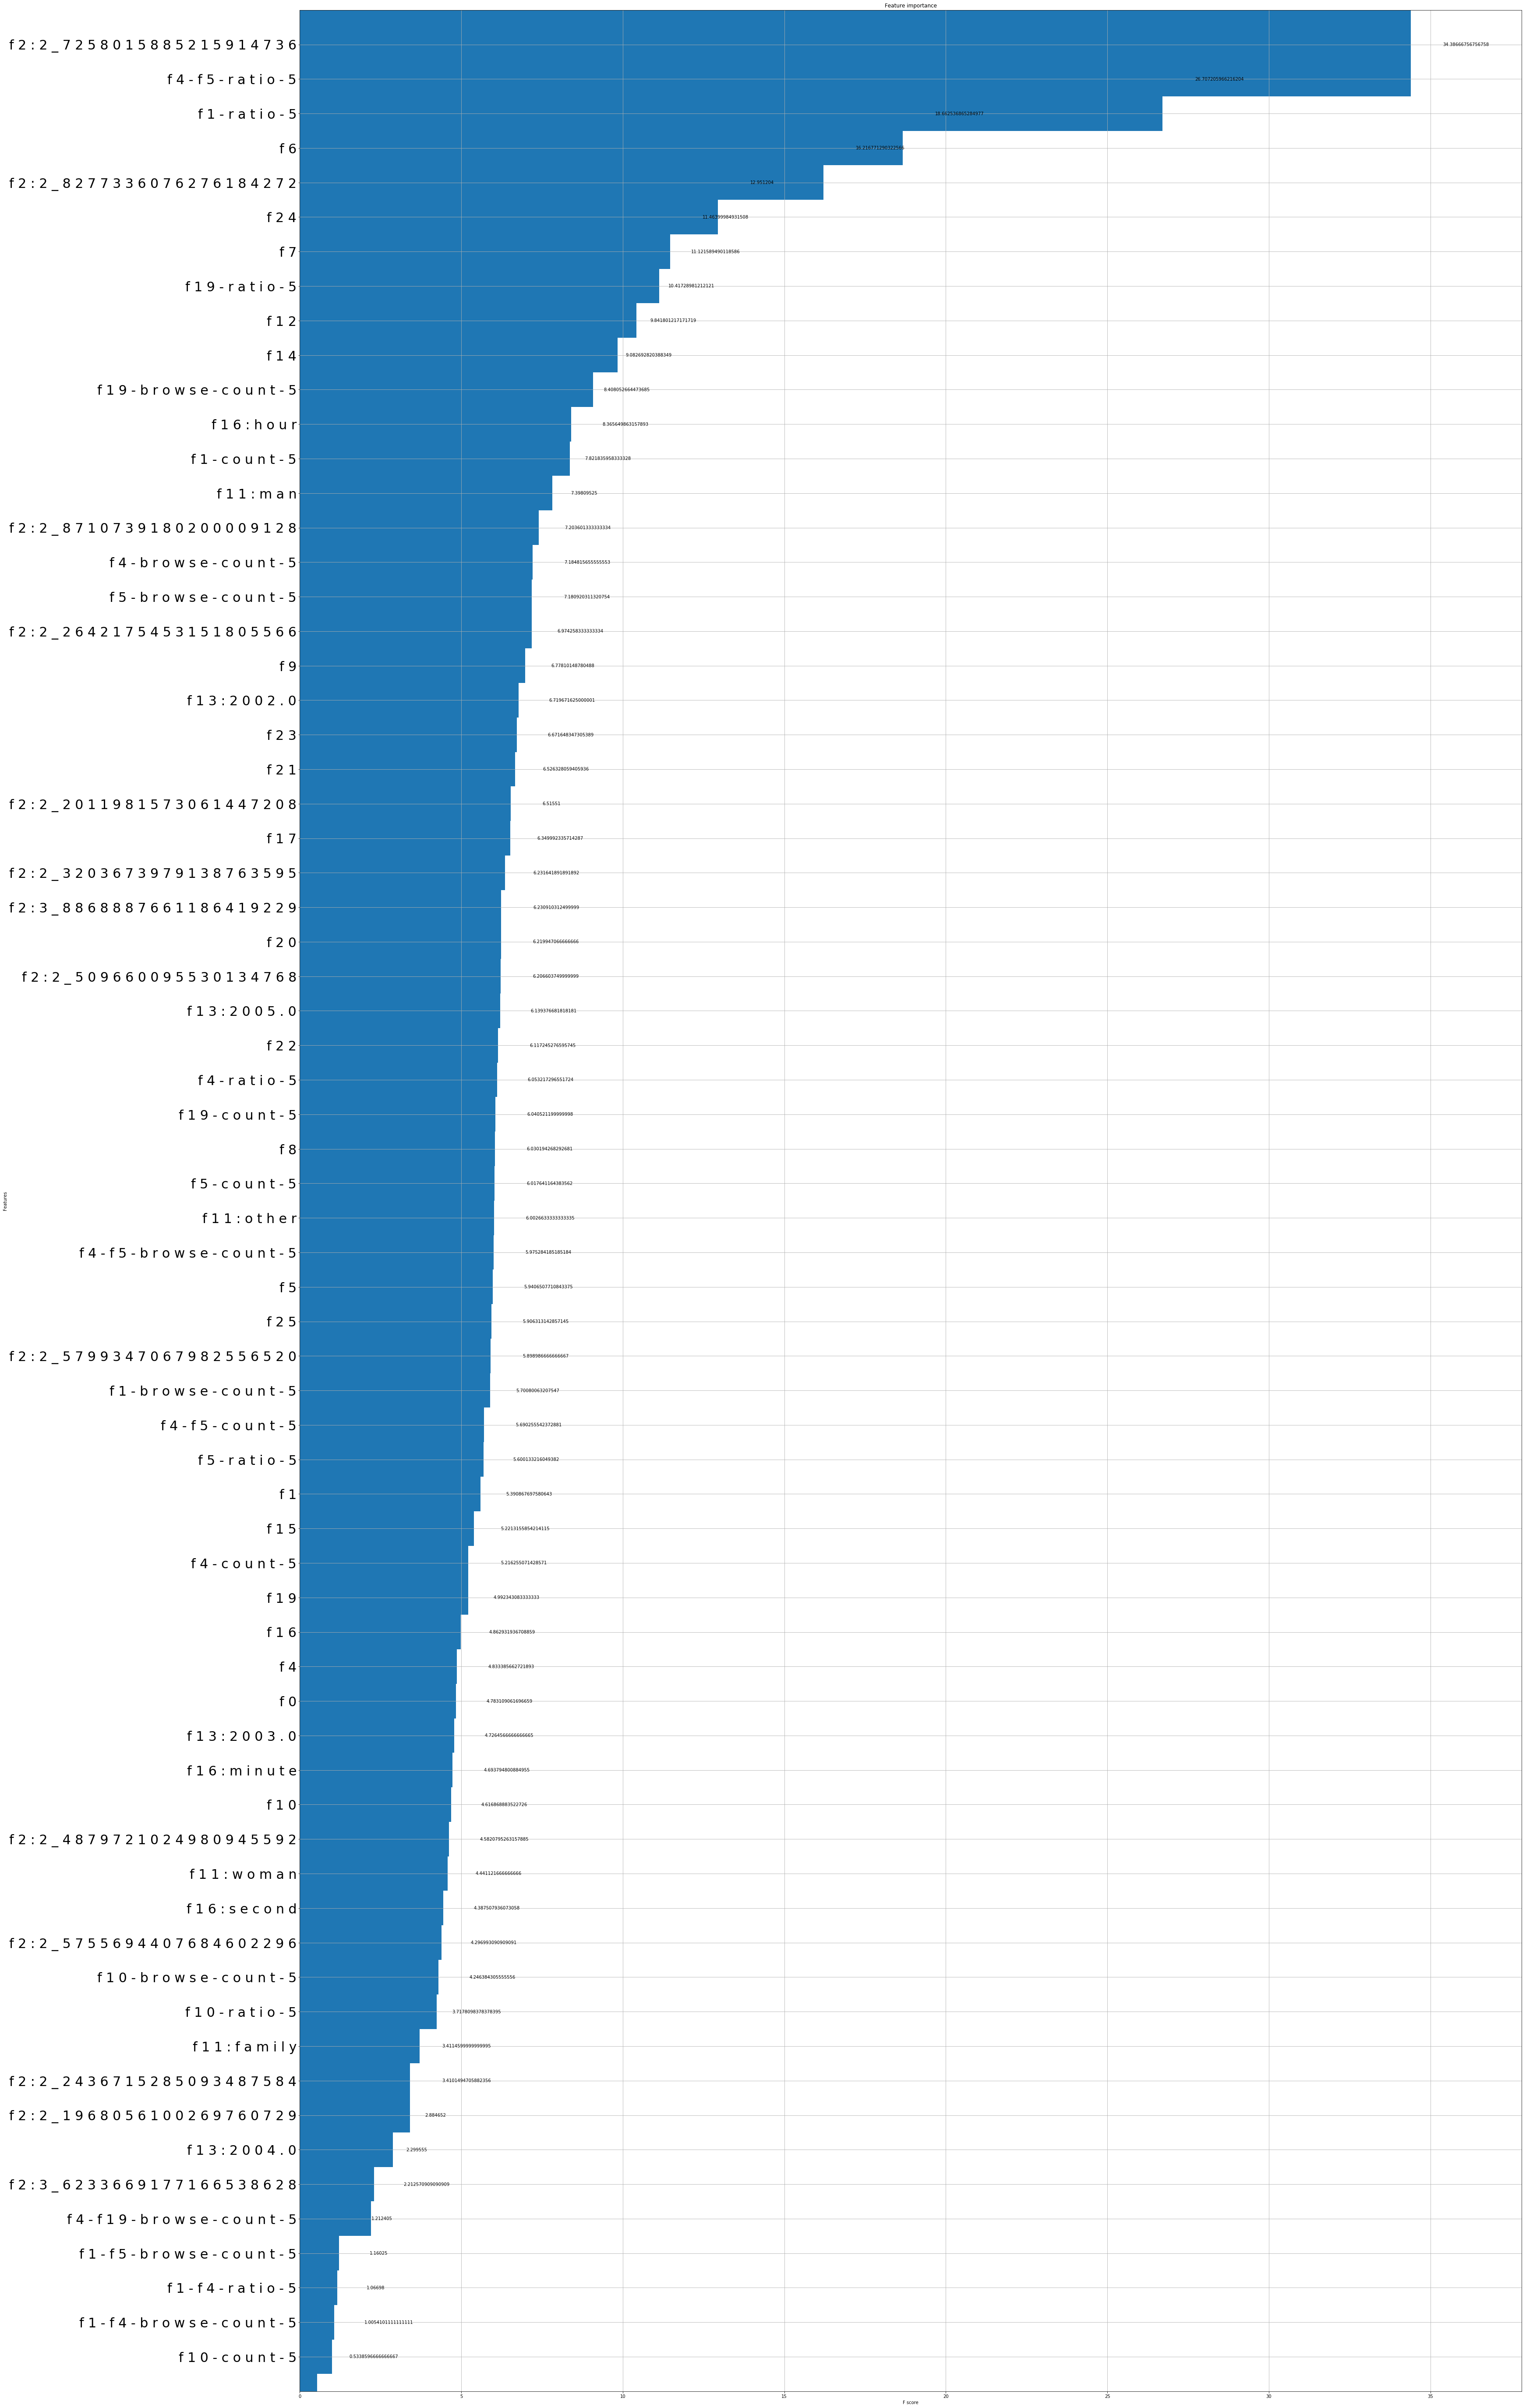

In [8]:
ax = plt.subplot(111)
plt.yticks(fontsize=30)
ax = xgb.plot_importance(bst,ax,importance_type = 'gain',height  = 3)
fig = ax.figure
fig.set_size_inches(50, 100)

In [216]:
# 预测
label_test_xgb = bst.predict(test)
# 4.保存
np.savetxt('data/round1_result_xgb.txt', np.c_[data_index, label_test_xgb], delimiter=',', header='instance_id predicted_score',comments='', fmt='%s %f')

In [27]:
from sklearn.model_selection import GroupKFold

data = pd.read_pickle('data/round1_train2')

gkf = GroupKFold(n_splits=8)

for train, test in gkf.split(data.drop('label',axis = 1),data['label'],groups=data['f16:day']):
    print(len(test))

77371
71094
70322
68559
68082
62778
52446
6651


In [ ]:
data = pd.read_pickle('data/round1_train2')
data = xgb.DMatrix(data.drop('label',axis = 1),label = data['label'])

bst = xgb.cv(param, data, num_boost_round, folds=gkf, early_stopping_rounds=50,verbose_eval = True)

## 2.训练SVM

In [45]:
from sklearn import svm,datasets
from sklearn.metrics import log_loss

#调用SVC()
# 参数见：http://blog.csdn.net/xiaodongxiexie/article/details/70667101
clf = svm.SVC(
            C=0.001, 
            kernel='rbf', 
            degree=3, 
            gamma='auto', 
            coef0=0.0, 
            probability=False, 
            shrinking=True, 
            tol=0.001, 
            cache_size=200, 
            class_weight='balanced', 
            verbose=True, 
            max_iter=1000, 
            decision_function_shape='ovr', 
            random_state=None
)
#载入鸢尾花数据集
iris = datasets.load_iris()

#fit()训练
clf.fit(feature_train,label_train)

#predict()预测
label_val_svm = clf.predict(feature_val)
print(log_loss(label_val,label_val_svm))

[LibSVM]

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


33.957631066


## 3.训练逻辑回归

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss


feature_train_now = StandardScaler().fit_transform(feature_train)


clf_l1_LR= LogisticRegression(
#    tol = 0.0001,C = 0.00005, penalty = 'l1',max_iter = 500,class_weight = 'balanced',verbose = 2
) 
clf_l1_LR.fit(feature_train_now,label_train)
label_val_lr = clf_l1_LR.predict(feature_val)  
print(log_loss(label_val,label_val_lr))


clf_l2_LR= LogisticRegression(
#    tol = 0.0001,C = 0.0001, penalty = 'l2',max_iter = 500,class_weight = 'balanced',verbose = 2
) 
clf_l2_LR.fit(feature_train_now,label_train)
label_val_lr = clf_l2_LR.predict(feature_val)
print(log_loss(label_val,label_val_lr))

1.1711058309
1.1711058309


# 4.AdaBoost

In [55]:
clf = AdaBoostClassifier() #迭代100次  
clf.fit(feature_train,label_train)
label_val_lr = clf.predict(feature_val)  
print(log_loss(label_val,label_val_lr))

0.581931454242


# 5.训练Random Forest

In [56]:
clf = RandomForestClassifier()
clf.fit(feature_train , label_train)
label_val_rf = clf.predict(feature_val)    
print(log_loss(label_val,label_val_rf))

0.584341164082


# 6.lightbgm

In [101]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='binary',

                        num_leaves=64,

                        learning_rate=0.01,

                        n_estimators=2000)

gbm.fit(feature_train, label_train,

        eval_set=[(feature_val, label_val)],

        eval_metric='binary_logloss',

        early_stopping_rounds=300)

[1]	valid_0's binary_logloss: 0.0855737
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's binary_logloss: 0.085507
[3]	valid_0's binary_logloss: 0.0854457
[4]	valid_0's binary_logloss: 0.0853916
[5]	valid_0's binary_logloss: 0.085329
[6]	valid_0's binary_logloss: 0.0852804
[7]	valid_0's binary_logloss: 0.0852229
[8]	valid_0's binary_logloss: 0.0851817
[9]	valid_0's binary_logloss: 0.0851342
[10]	valid_0's binary_logloss: 0.0850795
[11]	valid_0's binary_logloss: 0.0850421
[12]	valid_0's binary_logloss: 0.0849957
[13]	valid_0's binary_logloss: 0.0849604
[14]	valid_0's binary_logloss: 0.0849126
[15]	valid_0's binary_logloss: 0.0848723
[16]	valid_0's binary_logloss: 0.0848304
[17]	valid_0's binary_logloss: 0.0847939
[18]	valid_0's binary_logloss: 0.0847601
[19]	valid_0's binary_logloss: 0.0847213
[20]	valid_0's binary_logloss: 0.0846903
[21]	valid_0's binary_logloss: 0.0846507
[22]	valid_0's binary_logloss: 0.084619
[23]	valid_0's binary_logloss: 0.084584
[24]	va

[204]	valid_0's binary_logloss: 0.0825247
[205]	valid_0's binary_logloss: 0.0825185
[206]	valid_0's binary_logloss: 0.082516
[207]	valid_0's binary_logloss: 0.0825135
[208]	valid_0's binary_logloss: 0.0825106
[209]	valid_0's binary_logloss: 0.0825118
[210]	valid_0's binary_logloss: 0.0825055
[211]	valid_0's binary_logloss: 0.0825025
[212]	valid_0's binary_logloss: 0.0825008
[213]	valid_0's binary_logloss: 0.0824956
[214]	valid_0's binary_logloss: 0.0824905
[215]	valid_0's binary_logloss: 0.0824873
[216]	valid_0's binary_logloss: 0.082487
[217]	valid_0's binary_logloss: 0.0824891
[218]	valid_0's binary_logloss: 0.0824888
[219]	valid_0's binary_logloss: 0.0824885
[220]	valid_0's binary_logloss: 0.0824837
[221]	valid_0's binary_logloss: 0.0824767
[222]	valid_0's binary_logloss: 0.0824721
[223]	valid_0's binary_logloss: 0.0824713
[224]	valid_0's binary_logloss: 0.0824727
[225]	valid_0's binary_logloss: 0.0824689
[226]	valid_0's binary_logloss: 0.0824686
[227]	valid_0's binary_logloss: 0.08

[406]	valid_0's binary_logloss: 0.0821883
[407]	valid_0's binary_logloss: 0.0821899
[408]	valid_0's binary_logloss: 0.0821884
[409]	valid_0's binary_logloss: 0.0821851
[410]	valid_0's binary_logloss: 0.082186
[411]	valid_0's binary_logloss: 0.0821895
[412]	valid_0's binary_logloss: 0.082189
[413]	valid_0's binary_logloss: 0.0821868
[414]	valid_0's binary_logloss: 0.0821874
[415]	valid_0's binary_logloss: 0.0821868
[416]	valid_0's binary_logloss: 0.0821863
[417]	valid_0's binary_logloss: 0.0821863
[418]	valid_0's binary_logloss: 0.0821893
[419]	valid_0's binary_logloss: 0.0821911
[420]	valid_0's binary_logloss: 0.0821912
[421]	valid_0's binary_logloss: 0.082188
[422]	valid_0's binary_logloss: 0.082185
[423]	valid_0's binary_logloss: 0.0821871
[424]	valid_0's binary_logloss: 0.0821865
[425]	valid_0's binary_logloss: 0.0821845
[426]	valid_0's binary_logloss: 0.0821835
[427]	valid_0's binary_logloss: 0.0821853
[428]	valid_0's binary_logloss: 0.0821851
[429]	valid_0's binary_logloss: 0.0821

[603]	valid_0's binary_logloss: 0.0824784
[604]	valid_0's binary_logloss: 0.0824834
[605]	valid_0's binary_logloss: 0.0824752
[606]	valid_0's binary_logloss: 0.0824749
[607]	valid_0's binary_logloss: 0.082475
[608]	valid_0's binary_logloss: 0.0824766
[609]	valid_0's binary_logloss: 0.082478
[610]	valid_0's binary_logloss: 0.0824795
[611]	valid_0's binary_logloss: 0.08249
[612]	valid_0's binary_logloss: 0.0824893
[613]	valid_0's binary_logloss: 0.0825065
[614]	valid_0's binary_logloss: 0.0825064
[615]	valid_0's binary_logloss: 0.0825064
[616]	valid_0's binary_logloss: 0.0825037
[617]	valid_0's binary_logloss: 0.0825052
[618]	valid_0's binary_logloss: 0.0825054
[619]	valid_0's binary_logloss: 0.0825065
[620]	valid_0's binary_logloss: 0.0825082
[621]	valid_0's binary_logloss: 0.0825094
[622]	valid_0's binary_logloss: 0.0825127
[623]	valid_0's binary_logloss: 0.082513
[624]	valid_0's binary_logloss: 0.0825185
[625]	valid_0's binary_logloss: 0.0825175
[626]	valid_0's binary_logloss: 0.08252

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=64,
       objective='binary', random_state=0, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=50000,
       subsample_freq=1)

In [63]:
label_val_bgm = gbm.predict(feature_val, num_iteration=gbm.best_iteration_)

label_test = gbm.predict(feature_test, num_iteration=gbm.best_iteration_)

print(log_loss(label_val,label_val_bgm))

0.0821183476381


In [64]:
np.savetxt('data/round1_result_lgb.txt', np.c_[data_index, label_test], delimiter=',', header='instance_id predicted_score',comments='', fmt='%s %f')

# 7.GBDT

In [61]:
from sklearn.ensemble import GradientBoostingClassifier    
model = GradientBoostingClassifier()    
model.fit(feature_train, label_train)    
label_val_gbdt = clf.predict(feature_val)  
print(log_loss(label_val,label_val_gbdt))

0.584341164082


# 8.FM/FFM


In [62]:
label_train[label_train < 0.5] = -1.0

In [63]:
feature_train = csc_matrix(feature_train)

In [64]:
feature_val = csc_matrix(feature_val)

In [65]:
from fastFM import sgd,mcmc
fm = sgd.FMClassification(
#     n_iter=1000, init_stdev=0.1, l2_reg_w=0,l2_reg_V=0, rank=2, step_size=0.1
)
fm.fit(feature_train, label_train)
label_val_fm = fm.predict(feature_val)

# fm = mcmc.FMClassification(n_iter=1000, rank=2, init_stdev=0.1)
# y_pred = fm.fit_predict(X_train, y_train, X_test)
# label_val_fm = fm.fit_predict_proba(X_train, y_train, X_test)

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/fastFM/base.py:123: RuntimeWarning: invalid value encountered in greater
  y_pred[y_proba > .5] = self.classes_[1]


In [66]:
pd.Series(label_val_fm).value_counts()

-1.0    57334
dtype: int64

# 9.集成
要求：
- Base Model 之间的相关性要尽可能的小
- Base Model 之间的性能表现不能差距太大

## 9.1Bagging
- 使用训练数据的不同随机子集来训练每个 Base Model，最后进行每个 Base Model 权重相同的 Vote。

## 9.2Boosting
- 迭代地训练 Base Model，每次根据上一个迭代中预测错误的情况修改训练样本的权重。

## 9.3Blending
- 用不相交的数据训练不同的 Base Model，将它们的输出取（加权）平均。实现简单，但对训练数据利用少了。

## 9.4Stacking
- 我用了两层的模型融合，Level 1使用了：XGBoost、LightGBM、RandomForest、ExtraTrees、DecisionTree、AdaBoost，一共6个模型，Level 2使用了LinearRegression来拟合第一层的结果。
- http://blog.csdn.net/a358463121/article/details/53054686